### Embedding using the detector FaceAnalysis

#### Import dependencies

In [11]:
import cv2
import numpy as np
from insightface.app import FaceAnalysis
from matplotlib import pyplot as plt

### Initials image path

In [12]:
img_path = r"105_classes_dataset/pins_Adnan/Snapchat-985749857.jpg"

#### Read the image using opencv

In [13]:
img = cv2.imread(img_path); assert img is not None

#### Show the image using matplotlib with rgb

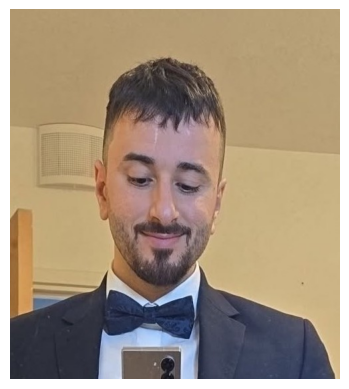

In [14]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

In [15]:
#shape of the image 
print("original:", img.shape)

original: (554, 494, 3)


#### Upscale to ~1536 on the long side + pad for context due to issue with The detector isn’t returning any boxes on that small, tightly-cropped image

In [16]:
h, w = img.shape[:2]
scale = 1536.0 / max(h, w)
if scale > 1.0:
    img = cv2.resize(img, (int(w*scale), int(h*scale)), interpolation=cv2.INTER_LINEAR)
pad = int(max(img.shape[:2]) * 0.80)
img = cv2.copyMakeBorder(img, pad, pad, pad, pad, borderType=cv2.BORDER_CONSTANT,value=(255, 255, 255))

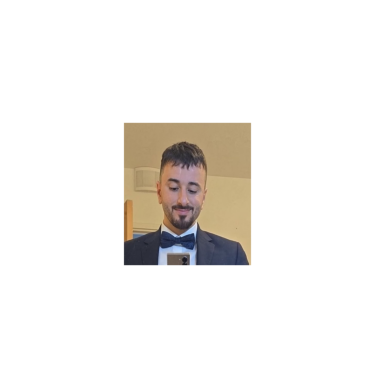

In [17]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()

#### Embedding the image using the FaceAnalysis buffalo_l

In [18]:
app = FaceAnalysis(name="buffalo_l", providers=['CPUExecutionProvider'])
app.prepare(ctx_id=-1, det_size=(1536,1536), det_thresh=0.14)

faces = app.get(img)
print("faces found:", len(faces))
if faces:
    e = faces[0].embedding
    print("embedding shape:", e.shape, "norm:", np.linalg.norm(e))

Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\adnan/.insightface\models\buffalo_l\1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\adnan/.insightface\models\buffalo_l\2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\adnan/.insightface\models\buffalo_l\det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\adnan/.insightface\models\buffalo_l\genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: C:\Users\adnan/.insightface\models\buffalo_l\w600k_r50.onnx recognition ['None', 3, 112, 112] 127.

#### Detector outputs (bbox, score, 5 landmarks)

In [19]:
f = faces[0]

print("bbox:", f.bbox)            # Bounding box: top-left (x1, y1), bottom-right (x2, y2)
print("score:", f.det_score)      # Detection confidence score
print("kps shape:", f.kps)        # 5 facial keypoints: left eye, right eye, nose tip, left mouth corner, right mouth corner


bbox: [1631.8987 1635.8684 2094.8223 2371.3528]
score: 0.90422726
kps shape: [[1771.4028 1933.0432]
 [1971.5834 1952.4698]
 [1868.6877 2086.6963]
 [1760.1703 2147.1838]
 [1957.1759 2163.9634]]


#### Face crop

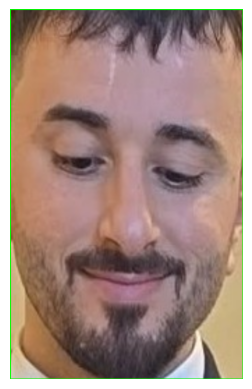

In [20]:
f = faces[0]
x1, y1, x2, y2 = map(int, f.bbox)


vis = img.copy()
cv2.rectangle(vis, (x1, y1), (x2, y2), (0,255,0), 2)

h, w = vis.shape[:2]
crop = vis[max(0,y1):min(h,y2), max(0,x1):min(w,x2)]
img_rgb = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.axis('off')
plt.show()